# Set relevant variables

In [1]:
path_to_aspera_licence = '/data/pacbio_assembly/pb_data/asperaweb_id_dsa.openssh'
path_to_hinge = '~/AwesomeAssembler/'

# Import libraries

In [2]:
import os
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt 
import random 
import forceatlas2 

In [5]:
os.system('mkdir -p data')

0

# Download the relevant files

We use [aspera](http://www.asperasoft.com/downloads/connect) to download. Other ways to download the relevant files from the accession numbers in the paper can be found [here](https://www.ebi.ac.uk/ena/browse/read-download).

In [3]:
download_cmd = 'python download_wrapper.py '+ path_to_aspera_licence
os.system(download_cmd)

# Obtain the overlaps

In [7]:
overlap_cmd = 'python overlap_wrapper.py'
os.system(overlap_cmd)

# Download NCTC assemblies and extract fastas

In [8]:
assembly_download_cmd = 'python download_assemblies.py'
assembly_extract_cmd = 'python get_hgap_fastas.py'
os.system(assembly_download_cmd)
os.system(assembly_extract_cmd)

In [13]:
map_cmd = 'python map_wrapper.py '+path_to_hinge
os.system(map_cmd)

# Run Layout and overlay NCTC assembly colours

In [14]:
layout_cmd = 'python pipeline_layout_wrapper.py '+path_to_hinge
os.system(layout_cmd)

# Draw NCTC9657

In [25]:
H9657 = nx.read_graphml('data/NCTC9657/NCTC9657A.G2c.graphml')
G9657 = H9657.to_undirected()
pos = { i : (random.random(), random.random()) for i in G9657.nodes()} 
l9657 = forceatlas2.forceatlas2_networkx_layout(G9657, pos, niter=10000) 

%matplotlib inline

color_map9657 = {}
for x in G9657.nodes():
    
    try:
        color_map9657[x] = H9657.node[x.lstrip('B')]['chr']*50
    except:
        color_map9657[x] = 11.3
values9657 = [color_map9657.get(node, 0.25) for node in G9657.nodes()]
nx.draw_networkx(G9657, l9657, with_labels=False, node_color=values9657, node_size=8,linewidths=0.1) 
plt.show()

# Draw NCTC9964

In [30]:
H9964 = nx.read_graphml('data/NCTC9964/NCTC9964A.G2c.graphml')
G9964 = H9964.to_undirected()
pos = { i : (random.random(), random.random()) for i in G9964.nodes()} 
l9964 = forceatlas2.forceatlas2_networkx_layout(G9964, pos, niter=10000) 

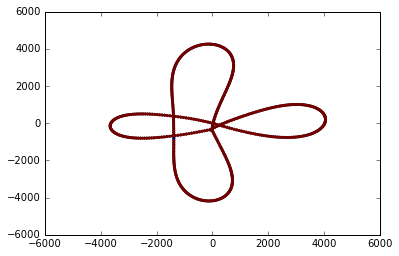

In [32]:
color_map9964 = {}
for x in G9964.nodes():
    
    try:
        color_map9964[x] = H9964.node[x.lstrip('B')]['chr']*50
    except:
        color_map9964[x] = 11.3
values9964 = [color_map9964.get(node, 0.25) for node in G9964.nodes()]
nx.draw_networkx(G9964, l9964, with_labels=False, node_color=values9964, node_size=8,linewidths=0.1) 
plt.show()

# Draw NCTC11022

In [33]:
H11022 = nx.read_graphml('data/NCTC11022/NCTC11022A.G2c.graphml')
G11022 = H11022.to_undirected()
pos = { i : (random.random(), random.random()) for i in G11022.nodes()} 
l11022 = forceatlas2.forceatlas2_networkx_layout(G11022, pos, niter=10000) 

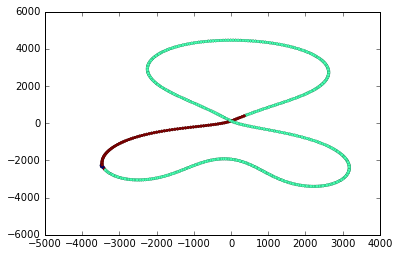

In [34]:
color_map11022 = {}
for x in G11022.nodes():
    
    try:
        color_map11022[x] = H11022.node[x.lstrip('B')]['chr']*50
    except:
        color_map11022[x] = 11.3
values11022 = [color_map11022.get(node, 0.25) for node in G11022.nodes()]
nx.draw_networkx(G11022, l11022, with_labels=False, node_color=values11022, node_size=8,linewidths=0.1) 
plt.show()